In [203]:
# Essentials
import numpy as np
import pandas as pd
import datetime
import random

# Plots
import seaborn as sns
import matplotlib.pyplot as plt

# Models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# Stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# Misc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

pd.set_option('display.max_columns', None)

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore")
pd.options.display.max_seq_items = 8000
pd.options.display.max_rows = 8000

In [204]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


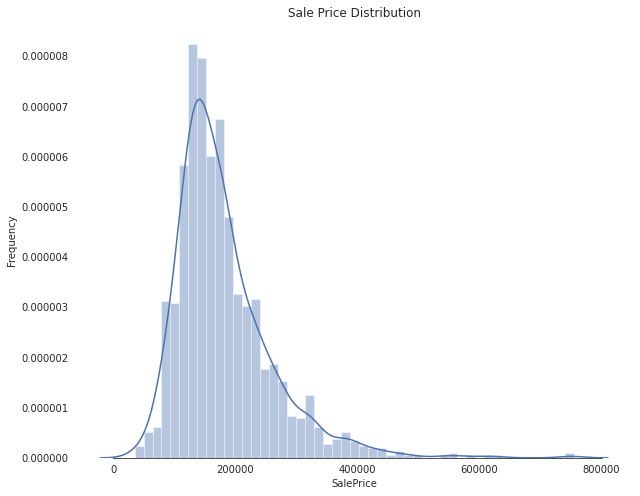

In [205]:
sns.set_style('white')
sns.set_color_codes(palette='deep')
f, ax=plt.subplots(figsize=(10, 8))

sns.distplot(train_df['SalePrice'], color='b')
ax.set(ylabel='Frequency')
ax.set(xlabel='SalePrice')
ax.set(title='Sale Price Distribution')
ax.ticklabel_format(style='plain')
sns.despine(trim=True, left=True)
plt.show()

It seems like the data is not normally distributed.

In [206]:
print('skewness: %f' % train_df['SalePrice'].skew())
print('kurtosis: %f' % train_df['SalePrice'].kurt())

skewness: 1.882876
kurtosis: 6.536282


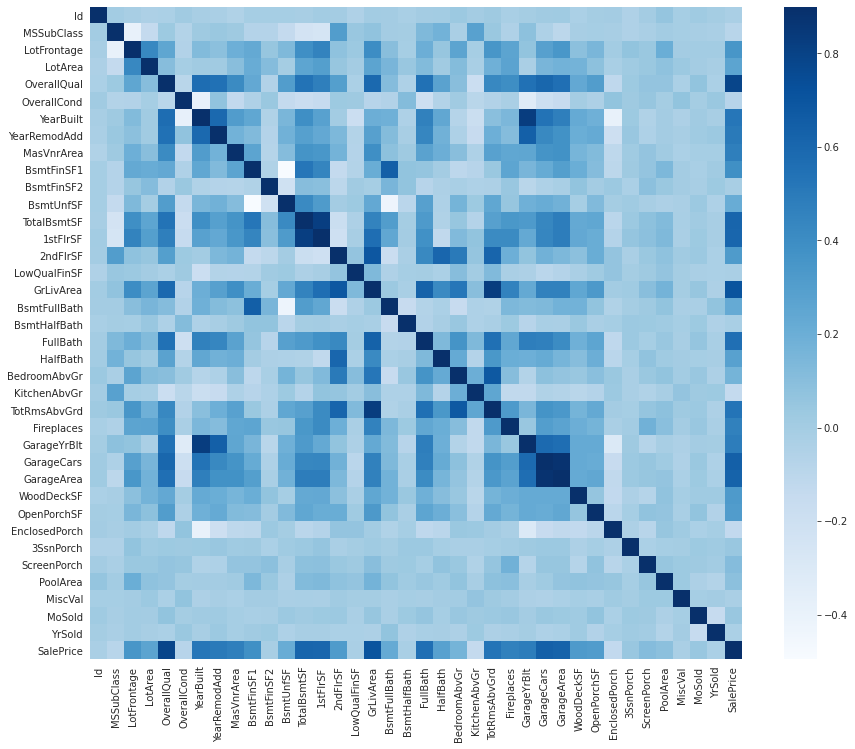

In [207]:
corr=train_df.corr()
plt.subplots(figsize=(15, 12))
sns.heatmap(corr, vmax=0.9, cmap='Blues', square=True)

(-0.5, 9.5, 0.0, 800000.0)

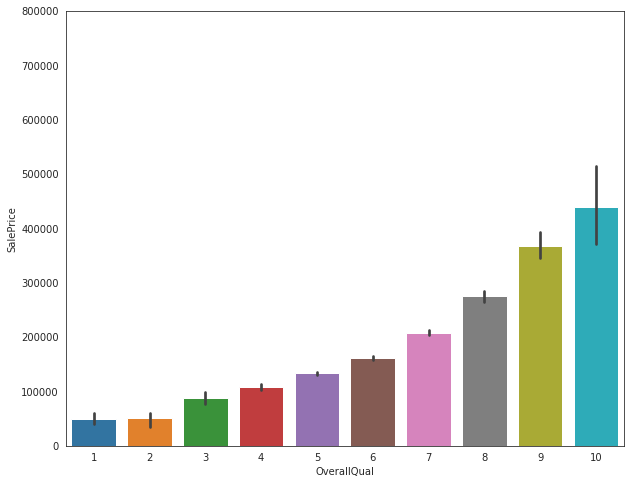

In [208]:
fig, ax=plt.subplots(figsize=(10, 8))
fig=sns.barplot(x=train_df['OverallQual'], y=train_df['SalePrice'], data=train_df)
fig.axis(ymin=0, ymax=800000)

We saw that the sale price data is not distributed normally which is a problem because most machine learning models don't work well in this kind of situation. So, we take the log of Sale Price to solve this issue.

# Feature Engineering

In [209]:
train_df['SalePrice']=np.log1p(train_df['SalePrice'])

Let's see if the applying the log works with our data.

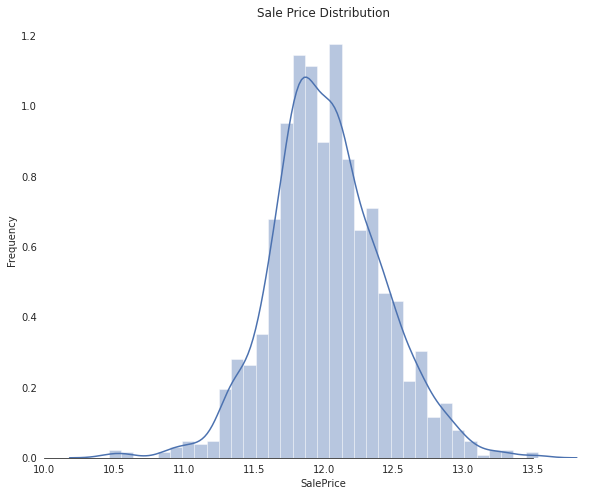

In [210]:
sns.set_style('white')
sns.set_color_codes(palette='deep')
f, ax=plt.subplots(figsize=(10, 8))

sns.distplot(train_df['SalePrice'], color='b')
ax.set(ylabel='Frequency')
ax.set(xlabel='SalePrice')
ax.set(title='Sale Price Distribution')
ax.ticklabel_format(style='plain')
sns.despine(trim=True, left=True)
plt.show()

In [211]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247699
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109016
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317171
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849405
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429220


In [212]:
train_df.shape

(1460, 81)

Now, it is normally distributed.

Let's also see if there is any outliers in our data.



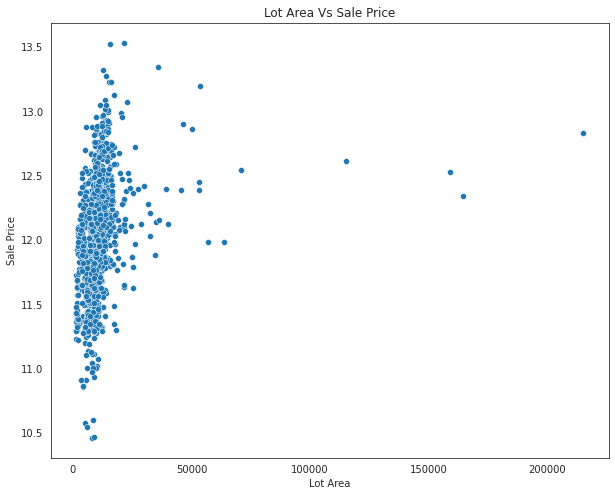

In [213]:
f, ax=plt.subplots(figsize=(10, 8))
sns.scatterplot(data=train_df, x='LotArea', y='SalePrice')
ax.set_xlabel('Lot Area')
ax.set_ylabel('Sale Price')
ax.set_title('Lot Area Vs Sale Price')
ax.ticklabel_format(style='plain')
plt.show()

So, we have outliers here in Lot Area.

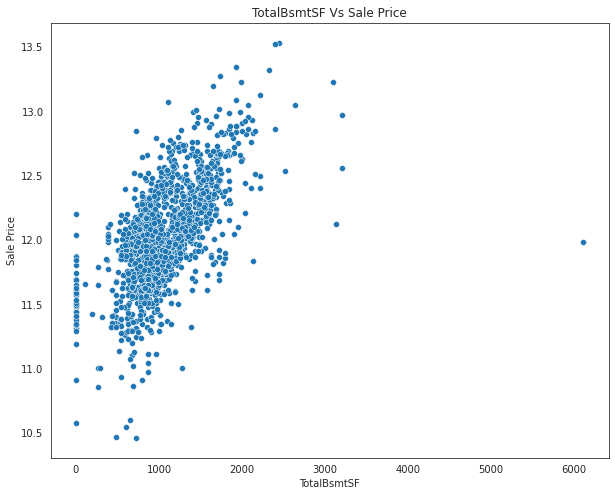

In [214]:
f, ax=plt.subplots(figsize=(10, 8))
sns.scatterplot(data=train_df, x='TotalBsmtSF', y='SalePrice')
ax.set_xlabel('TotalBsmtSF')
ax.set_ylabel('Sale Price')
ax.set_title('TotalBsmtSF Vs Sale Price')
ax.ticklabel_format(style='plain')
plt.show()

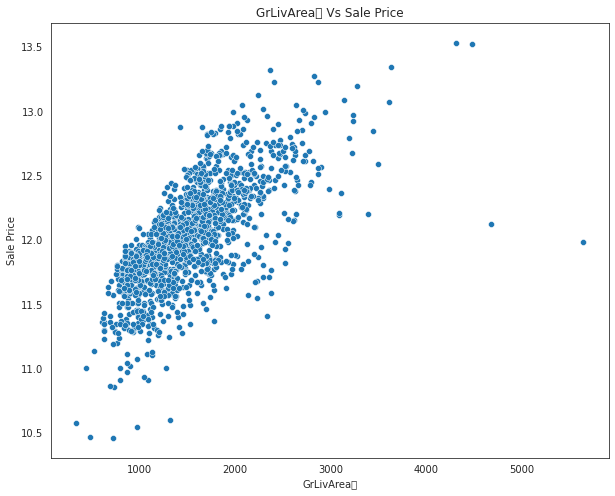

In [215]:
f, ax=plt.subplots(figsize=(10, 8))
sns.scatterplot(data=train_df, x='GrLivArea', y='SalePrice')
ax.set_xlabel('GrLivArea	')
ax.set_ylabel('Sale Price')
ax.set_title('GrLivArea	 Vs Sale Price')
ax.ticklabel_format(style='plain')
plt.show()

In [216]:
# Let's remove the outliers now.
train_df=train_df.drop(train_df[(train_df['GrLivArea']>3000) &(train_df['SalePrice']>13)].index)
train_df=train_df.drop(train_df[(train_df['TotalBsmtSF']>2000) &(train_df['TotalBsmtSF']<200)].index)
train_df=train_df.drop(train_df[(train_df['LotArea']>30000) &(train_df['SalePrice']>13)].index)
                       

In [217]:
train_df.shape

(1454, 81)

# Dealing with Missing Values

In [218]:
train_df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1363
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [219]:
train_df=train_df.drop(['PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu', 'Alley'], axis=1)

In [220]:
train_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath 

In [221]:
lot_mean=train_df['LotArea'].mean()
train_df['LotArea']=train_df['LotArea'].replace(np.nan, lot_mean)


In [222]:
train_df=train_df.dropna()
train_df.shape

(1088, 76)

In [223]:
train_df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object


Let's fix the skewed features.

In [224]:
numeric_data=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric=[]
for i in train_df.columns:
  if train_df[i].dtype in numeric_data:
    numeric.append(i)
  
#Let's find the skewed features now.
skewed_features=train_df[numeric].apply(lambda x: skew(x)).sort_values(ascending=False)
high_skewed=skewed_features[skewed_features>0.5]
skew_index=high_skewed.index 

print('Skewed features: ', high_skewed.shape[0])
skewness=pd.DataFrame({'Skew' : high_skewed})
skewed_features.head(20)

Skewed features:  27


LotArea          16.253174
PoolArea         14.917604
3SsnPorch        11.023550
LowQualFinSF     10.052018
MiscVal           9.632771
KitchenAbvGr      5.563309
BsmtFinSF2        4.352801
BsmtHalfBath      4.072986
ScreenPorch       3.961587
EnclosedPorch     3.150100
MasVnrArea        2.570414
OpenPorchSF       2.390606
TotalBsmtSF       2.357599
LotFrontage       2.253685
BsmtFinSF1        1.954292
WoodDeckSF        1.532954
MSSubClass        1.425857
1stFlrSF          1.379988
GrLivArea         1.343020
BsmtUnfSF         0.879659
dtype: float64

In [225]:
for i in skew_index:
  train_df[i]=boxcox1p(train_df[i], boxcox_normmax(train_df[i] + 1))


In [226]:
train_df.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.015648,-0.023092,-0.034643,-0.061873,0.012116,-0.027488,-0.031093,-0.059767,-0.015458,0.010138,-0.010164,-0.036901,-0.010520,-0.013322,-0.016702,-0.019002,0.023205,-0.026942,-0.001016,-0.016703,0.038206,0.013249,0.009630,-0.015653,-0.004686,-0.011300,-0.029200,-0.045318,0.004718,0.004131,-0.047273,0.024033,0.038954,0.024235,0.006705,0.005292,-0.047082
MSSubClass,0.015648,1.000000,-0.429062,-0.419690,0.060253,-0.062181,-0.015280,0.008601,0.032873,-0.102692,-0.088354,-0.139498,-0.343465,-0.339400,0.464639,0.064638,0.186906,-0.044744,0.011494,0.154755,0.296178,0.038095,0.242204,0.120488,0.011872,0.027643,-0.020912,-0.076644,0.006661,0.033377,0.014297,-0.024773,-0.016982,0.014711,-0.054881,-0.001827,-0.017621,-0.051427
LotFrontage,-0.023092,-0.429062,1.000000,0.720320,0.210807,-0.029347,0.087427,0.064407,0.154532,0.150005,0.045625,0.124539,0.368584,0.450163,0.051775,-0.038976,0.339887,0.097039,0.000575,0.167125,0.012017,0.297031,0.020052,0.360548,0.241836,0.049476,0.284532,0.338866,0.080666,0.154440,-0.008970,0.069618,0.045188,0.133003,0.022029,0.025755,0.014184,0.360308
LotArea,-0.034643,-0.419690,0.720320,1.000000,0.204722,-0.025706,0.028354,0.048963,0.072708,0.172763,0.063009,0.088129,0.384964,0.460584,0.077253,-0.028097,0.368316,0.154306,-0.014646,0.151261,0.029532,0.278405,0.011863,0.366579,0.306855,0.018642,0.260555,0.309878,0.149093,0.153645,-0.011472,0.037673,0.095541,0.107487,0.045762,0.021390,-0.030730,0.393720
OverallQual,-0.061873,0.060253,0.210807,0.204722,1.000000,-0.186975,0.601346,0.571370,0.438866,0.140229,-0.125590,0.274578,0.518371,0.488032,0.247193,-0.046082,0.616922,0.107529,-0.071840,0.587380,0.226226,0.073568,-0.142102,0.452517,0.403834,0.563237,0.597769,0.542284,0.292900,0.424289,-0.192630,0.018843,0.026289,0.054330,-0.100129,0.088385,0.002600,0.817846
OverallCond,0.012116,-0.062181,-0.029347,-0.025706,-0.186975,1.000000,-0.405814,0.030481,-0.203039,-0.025348,0.077708,-0.161869,-0.252554,-0.153505,-0.006701,0.009874,-0.145428,-0.069586,0.119187,-0.216790,-0.088339,0.011339,-0.078275,-0.100058,-0.035882,-0.336744,-0.267755,-0.243429,-0.028523,-0.147940,0.082871,0.006579,0.080845,-0.020681,0.108854,-0.013822,0.047510,-0.098683
YearBuilt,-0.027488,-0.015280,0.087427,0.028354,0.601346,-0.405814,1.000000,0.627667,0.405539,0.197439,-0.083214,0.136078,0.439179,0.299364,-0.015848,-0.135599,0.238615,0.176933,-0.056521,0.503762,0.214454,-0.075997,-0.186870,0.129603,0.136314,0.827543,0.537448,0.507871,0.273470,0.382956,-0.444900,0.027381,-0.061732,-0.003178,-0.111828,0.014708,-0.007630,0.606817
YearRemodAdd,-0.031093,0.008601,0.064407,0.048963,0.571370,0.030481,0.627667,1.000000,0.220818,0.058323,-0.100750,0.163265,0.291254,0.272160,0.098928,-0.047606,0.312121,0.103480,-0.023044,0.481399,0.151409,-0.089455,-0.165649,0.181464,0.115272,0.647310,0.472393,0.427312,0.276184,0.366727,-0.248986,0.029438,-0.040989,0.014426,-0.081108,0.031797,0.037208,0.599109
MasVnrArea,-0.059767,0.032873,0.154532,0.072708,0.438866,-0.203039,0.405539,0.220818,1.000000,0.243647,-0.081636,0.088076,0.376779,0.351479,0.097748,-0.092426,0.356455,0.130548,-0.017628,0.292617,0.163455,0.101686,-0.008065,0.299389,0.235846,0.331253,0.403309,0.381713,0.177137,0.203936,-0.183856,0.040204,0.042478,0.030825,-0.087723,0.030129,-0.012516,0.445535
BsmtFinSF1,-0.015458,-0.102692,0.150005,0.172763,0.140229,-0.025348,0.197439,0.058323,0.243647,1.000000,0.040687,-0.629262,0.377592,0.346035,-0.171054,-0.059227,0.090808,0.662431,0.073499,-0.014409,-0.024820,-0.112771,-0.036100,0.003442,0.215131,0.107133,0.123688,0.201586,0.150706,0.077245,-0.138485,0.04

In [227]:
# We will remove the features that have negative or low correlation with the target feature
train_df=train_df.drop(['Id', 'MSSubClass', 'OverallCond', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', 'MiscVal', 'YrSold', 'BsmtUnfSF', 'BsmtFullBath', 'HalfBath', 'BedroomAbvGr', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MoSold', 'Street', 'Utilities'], axis=1)
train_df.head()


,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition,SalePrice
0,RL,8.943245,12.779658,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.162585,Gd,TA,PConc,Gd,TA,No,GLQ,103.964693,Unf,11.812160,GasA,Ex,Y,SBrkr,5.156810,1974.207496,7.765817,2,Gd,2.191631,Typ,0.000000,Attchd,2003.0,RFn,2,19.181378,TA,TA,Y,0.000000,12.309553,WD,Normal,12.247699
1,RL,9.771571,13.026706,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,128.518835,Unf,12.931710,GasA,Ex,Y,SBrkr,5.373441,0.000000,7.436243,2,TA,1.941522,Typ,0.921127,Attchd,1976.0,RFn,2,18.015656,TA,TA,Y,66.164636,0.000000,WD,Normal,12.109016
2,RL,9.118376,13.337002,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,18.406247,Gd,TA,PConc,Gd,TA,Mn,GLQ,81.484312,Unf,12.015101,GasA,Ex,Y,SBrkr,5.197576,2005.949869,7.813089,2,Gd,1.941522,Typ,0.921127,Attchd,2001.0,RFn,2,19.903441,TA,TA,Y,0.000000,10.068998,WD,Normal,12.317171
3,RL,8.639024,13.016551,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,47.835621,Unf,11.467736,GasA,Gd,Y,SBrkr,5.222110,1717.448755,7.770257,1,Gd,2.074431,Typ,0.921127,Detchd,1998.0,Unf,3,20.290861,TA,TA,Y,0.000000,9.109582,WD,Abnorml,11.849405
4,RL,9.974693,13.807565,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,26.489442,Gd,TA,PConc,Gd,TA,Av,GLQ,99.007305,Unf,12.644819,GasA,Ex,Y,SBrkr,5.319798,2508.352242,8.039071,2,Gd,2.296443,Typ,0.921127,Attchd,2000.0,RFn,3,22.265223,TA,TA,Y,48.993358,14.567857,WD,Normal,12.429220


In [228]:
train_df.corr()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
LotFrontage,1.000000,0.720320,0.210807,0.087427,0.064407,0.154532,0.150005,0.368584,0.450163,0.051775,0.339887,0.167125,0.360548,0.241836,0.049476,0.284532,0.338866,0.080666,0.154440,0.360308
LotArea,0.720320,1.000000,0.204722,0.028354,0.048963,0.072708,0.172763,0.384964,0.460584,0.077253,0.368316,0.151261,0.366579,0.306855,0.018642,0.260555,0.309878,0.149093,0.153645,0.393720
OverallQual,0.210807,0.204722,1.000000,0.601346,0.571370,0.438866,0.140229,0.518371,0.488032,0.247193,0.616922,0.587380,0.452517,0.403834,0.563237,0.597769,0.542284,0.292900,0.424289,0.817846
YearBuilt,0.087427,0.028354,0.601346,1.000000,0.627667,0.405539,0.197439,0.439179,0.299364,-0.015848,0.238615,0.503762,0.129603,0.136314,0.827543,0.537448,0.507871,0.273470,0.382956,0.606817
YearRemodAdd,0.064407,0.048963,0.571370,0.627667,1.000000,0.220818,0.058323,0.291254,0.272160,0.098928,0.312121,0.481399,0.181464,0.115272,0.647310,0.472393,0.427312,0.276184,0.366727,0.599109
MasVnrArea,0.154532,0.072708,0.438866,0.405539,0.220818,1.000000,0.243647,0.376779,0.351479,0.097748,0.356455,0.292617,0.299389,0.235846,0.331253,0.403309,0.381713,0.177137,0.203936,0.445535
BsmtFinSF1,0.150005,0.172763,0.140229,0.197439,0.058323,0.243647,1.000000,0.377592,0.346035,-0.171054,0.090808,-0.014409,0.003442,0.215131,0.107133,0.123688,0.201586,0.150706,0.077245,0.293734
TotalBsmtSF,0.368584,0.384964,0.518371,0.439179,0.291254,0.376779,0.377592,1.000000,0.858662,-0.250436,0.423479,0.352869,0.296848,0.327160,0.361125,0.481721,0.508286,0.204744,0.308762,0.619361
1stFlrSF,0.450163,0.460584,0.488032,0.299364,0.272160,0.351479,0.346035,0.858662,1.000000,-0.246742,0.520590,0.358985,0.391468,0.395907,0.266630,0.461063,0.497229,0.234294,0.259011,0.616620
2ndFlrSF,0.051775,0.077253,0.247193,-0.015848,0.098928,0.097748,-0.171054,-0.250436,-0.246742,1.000000,0.658055,0.393196,0.597724,0.186480,0.039549,0.175941,0.107814,0.096318,0.208581,0.271663


In [229]:
train_df.columns

Index(['MSZoning', 'LotFrontage', 'LotArea', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

# Feature Transformation

In [230]:
def logs(res, ls):
    m = res.shape[1]
    for l in ls:
        res = res.assign(newcol=pd.Series(np.log(1.01+res[l])).values)   
        res.columns.values[m] = l + '_log'
        m += 1
    return res
  
log_features=['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF','1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath','TotRmsAbvGrd','Fireplaces','GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']

train_df=logs(train_df, log_features)

In [231]:
train_df.head()

,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition,SalePrice,LotFrontage_log,LotArea_log,MasVnrArea_log,BsmtFinSF1_log,TotalBsmtSF_log,1stFlrSF_log,2ndFlrSF_log,GrLivArea_log,FullBath_log,TotRmsAbvGrd_log,Fireplaces_log,GarageCars_log,GarageArea_log,WoodDeckSF_log,OpenPorchSF_log
0,RL,8.943245,12.779658,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.162585,Gd,TA,PConc,Gd,TA,No,GLQ,103.964693,Unf,11.812160,GasA,Ex,Y,SBrkr,5.156810,1974.207496,7.765817,2,Gd,2.191631,Typ,0.000000,Attchd,2003.0,RFn,2,19.181378,TA,TA,Y,0.000000,12.309553,WD,Normal,12.247699,2.297899,2.623919,3.052707,4.653719,2.551175,1.819182,7.588434,2.172000,1.101940,1.163660,0.009950,1.101940,3.005256,0.009950,2.589233
1,RL,9.771571,13.026706,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,128.518835,Unf,12.931710,GasA,Ex,Y,SBrkr,5.373441,0.000000,7.436243,2,TA,1.941522,Typ,0.921127,Attchd,1976.0,RFn,2,18.015656,TA,TA,Y,66.164636,0.000000,WD,Normal,12.109016,2.377838,2.641676,0.009950,4.863904,2.634885,1.853707,0.009950,2.133722,1.101940,1.082321,0.658104,1.101940,2.945788,4.207296,0.009950
2,RL,9.118376,13.337002,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,18.406247,Gd,TA,PConc,Gd,TA,Mn,GLQ,81.484312,Unf,12.015101,GasA,Ex,Y,SBrkr,5.197576,2005.949869,7.813089,2,Gd,1.941522,Typ,0.921127,Attchd,2001.0,RFn,2,19.903441,TA,TA,Y,0.000000,10.068998,WD,Normal,12.317171,2.315341,2.663541,2.966110,4.412729,2.566878,1.825771,7.604376,2.177372,1.101940,1.082321,0.658104,1.101940,3.040392,0.009950,2.405051
3,RL,8.639024,13.016551,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,47.835621,Unf,11.467736,GasA,Gd,Y,SBrkr,5.222110,1717.448755,7.770257,1,Gd,2.074431,Typ,0.921127,Detchd,1998.0,Unf,3,20.290861,TA,TA,Y,0.000000,9.109582,WD,Abnorml,11.849405,2.266857,2.640952,0.009950,3.888665,2.523946,1.829715,7.449183,2.172506,0.698135,1.126367,0.658104,1.388791,3.058748,0.009950,2.314472
4,RL,9.974693,13.807565,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,26.489442,Gd,TA,PConc,Gd,TA,Av,GLQ,99.007305,Unf,12.644819,GasA,Ex,Y,SBrkr,5.319798,2508.352242,8.039071,2,Gd,2.296443,Typ,0.921127,Attchd,2000.0,RFn,3,22.265223,TA,TA,Y,48.993358,14.567857,WD,Normal,12.429220,2.396503,2.695813,3.314166,4.605343,2.614092,1.845268,7.827784,2.202662,1.101940,1.195873,0.658104,1.388791,3.147389,3.912090,2.745851


In [232]:
def squares(res, ls):
    m = res.shape[1]
    for l in ls:
        res = res.assign(newcol=pd.Series(res[l]*res[l]).values)   
        res.columns.values[m] = l + '_sq'
        m += 1
    return res 

sqrt_features=['YearRemodAdd', 'LotFrontage_log', 'TotalBsmtSF_log', '1stFlrSF_log', '2ndFlrSF_log', 'GrLivArea_log', 'GarageCars_log', 'GarageArea_log']
train_df=squares(train_df, sqrt_features)
               

In [233]:
train_df.head()

,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition,SalePrice,LotFrontage_log,LotArea_log,MasVnrArea_log,BsmtFinSF1_log,TotalBsmtSF_log,1stFlrSF_log,2ndFlrSF_log,GrLivArea_log,FullBath_log,TotRmsAbvGrd_log,Fireplaces_log,GarageCars_log,GarageArea_log,WoodDeckSF_log,OpenPorchSF_log,YearRemodAdd_sq,LotFrontage_log_sq,TotalBsmtSF_log_sq,1stFlrSF_log_sq,2ndFlrSF_log_sq,GrLivArea_log_sq,GarageCars_log_sq,GarageArea_log_sq
0,RL,8.943245,12.779658,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.162585,Gd,TA,PConc,Gd,TA,No,GLQ,103.964693,Unf,11.812160,GasA,Ex,Y,SBrkr,5.156810,1974.207496,7.765817,2,Gd,2.191631,Typ,0.000000,Attchd,2003.0,RFn,2,19.181378,TA,TA,Y,0.000000,12.309553,WD,Normal,12.247699,2.297899,2.623919,3.052707,4.653719,2.551175,1.819182,7.588434,2.172000,1.101940,1.163660,0.009950,1.101940,3.005256,0.009950,2.589233,4012009,5.280338,6.508494,3.309422,57.584327,4.717583,1.214272,9.031562
1,RL,9.771571,13.026706,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,128.518835,Unf,12.931710,GasA,Ex,Y,SBrkr,5.373441,0.000000,7.436243,2,TA,1.941522,Typ,0.921127,Attchd,1976.0,RFn,2,18.015656,TA,TA,Y,66.164636,0.000000,WD,Normal,12.109016,2.377838,2.641676,0.009950,4.863904,2.634885,1.853707,0.009950,2.133722,1.101940,1.082321,0.658104,1.101940,2.945788,4.207296,0.009950,3904576,5.654115,6.942619,3.436231,0.000099,4.552768,1.214272,8.677669
2,RL,9.118376,13.337002,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,18.406247,Gd,TA,PConc,Gd,TA,Mn,GLQ,81.484312,Unf,12.015101,GasA,Ex,Y,SBrkr,5.197576,2005.949869,7.813089,2,Gd,1.941522,Typ,0.921127,Attchd,2001.0,RFn,2,19.903441,TA,TA,Y,0.000000,10.068998,WD,Normal,12.317171,2.315341,2.663541,2.966110,4.412729,2.566878,1.825771,7.604376,2.177372,1.101940,1.082321,0.658104,1.101940,3.040392,0.009950,2.405051,4008004,5.360804,6.588864,3.333438,57.826540,4.740949,1.214272,9.243984
3,RL,8.639024,13.016551,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,47.835621,Unf,11.467736,GasA,Gd,Y,SBrkr,5.222110,1717.448755,7.770257,1,Gd,2.074431,Typ,0.921127,Detchd,1998.0,Unf,3,20.290861,TA,TA,Y,0.000000,9.109582,WD,Abnorml,11.849405,2.266857,2.640952,0.009950,3.888665,2.523946,1.829715,7.449183,2.172506,0.698135,1.126367,0.658104,1.388791,3.058748,0.009950,2.314472,3880900,5.138640,6.370303,3.347857,55.490329,4.719781,1.928741,9.355936
4,RL,9.974693,13.807565,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,26.489442,Gd,TA,PConc,Gd,TA,Av,GLQ,99.007305,Unf,12.644819,GasA,Ex,Y,SBrkr,5.319798,2508.352242,8.039071,2,Gd,2.296443,Typ,0.921127,Attchd,2000.0,RFn,3,22.265223,TA,TA,Y,48.993358,14.567857,WD,Normal,12.429220,2.396503,2.695813,3.314166,4.605343,2.614092,1.845268,7.827784,2.202662,1.101940,1.195873,0.658104,1.388791,3.147389,3.912090,2.745851,4000000,5.743225,6.833479,3.405015,61.274201,4.851720,1.928741,9.906060


# Dealing with Categorical data

In [234]:
print(train_df['MSZoning'].value_counts())
print(train_df['LotShape'].value_counts())
print(train_df['LandContour'].value_counts())
print(train_df['LotConfig'].value_counts())
print(train_df['LandSlope'].value_counts())
print(train_df['Neighborhood'].value_counts())
print(train_df['Condition1'].value_counts())
print(train_df['Condition2'].value_counts())
print(train_df['BldgType'].value_counts())
print(train_df['HouseStyle'].value_counts())

RL         845
RM         172
FV          54
RH           9
C (all)      8
Name: MSZoning, dtype: int64
Reg    759
IR1    298
IR2     24
IR3      7
Name: LotShape, dtype: int64
Lvl    986
Bnk     45
HLS     43
Low     14
Name: LandContour, dtype: int64
Inside     828
Corner     185
CulDSac     42
FR2         29
FR3          4
Name: LotConfig, dtype: int64
Gtl    1040
Mod      43
Sev       5
Name: LandSlope, dtype: int64
NAmes      173
CollgCr    122
OldTown     95
Somerst     75
NridgHt     73
Edwards     65
Gilbert     49
NWAmes      45
SawyerW     44
Sawyer      44
BrkSide     42
Crawfor     41
Mitchel     30
NoRidge     30
Timber      29
IDOTRR      27
SWISU       19
StoneBr     19
BrDale      15
Blmngtn     14
ClearCr     11
MeadowV     10
NPkVill      7
Veenker      7
Blueste      2
Name: Neighborhood, dtype: int64
Norm      945
Feedr      52
Artery     41
RRAn       24
PosN        9
RRAe        8
PosA        4
RRNn        4
RRNe        1
Name: Condition1, dtype: int64
Norm      1

In [235]:
train_df.head()

,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition,SalePrice,LotFrontage_log,LotArea_log,MasVnrArea_log,BsmtFinSF1_log,TotalBsmtSF_log,1stFlrSF_log,2ndFlrSF_log,GrLivArea_log,FullBath_log,TotRmsAbvGrd_log,Fireplaces_log,GarageCars_log,GarageArea_log,WoodDeckSF_log,OpenPorchSF_log,YearRemodAdd_sq,LotFrontage_log_sq,TotalBsmtSF_log_sq,1stFlrSF_log_sq,2ndFlrSF_log_sq,GrLivArea_log_sq,GarageCars_log_sq,GarageArea_log_sq
0,RL,8.943245,12.779658,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.162585,Gd,TA,PConc,Gd,TA,No,GLQ,103.964693,Unf,11.812160,GasA,Ex,Y,SBrkr,5.156810,1974.207496,7.765817,2,Gd,2.191631,Typ,0.000000,Attchd,2003.0,RFn,2,19.181378,TA,TA,Y,0.000000,12.309553,WD,Normal,12.247699,2.297899,2.623919,3.052707,4.653719,2.551175,1.819182,7.588434,2.172000,1.101940,1.163660,0.009950,1.101940,3.005256,0.009950,2.589233,4012009,5.280338,6.508494,3.309422,57.584327,4.717583,1.214272,9.031562
1,RL,9.771571,13.026706,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,128.518835,Unf,12.931710,GasA,Ex,Y,SBrkr,5.373441,0.000000,7.436243,2,TA,1.941522,Typ,0.921127,Attchd,1976.0,RFn,2,18.015656,TA,TA,Y,66.164636,0.000000,WD,Normal,12.109016,2.377838,2.641676,0.009950,4.863904,2.634885,1.853707,0.009950,2.133722,1.101940,1.082321,0.658104,1.101940,2.945788,4.207296,0.009950,3904576,5.654115,6.942619,3.436231,0.000099,4.552768,1.214272,8.677669
2,RL,9.118376,13.337002,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,18.406247,Gd,TA,PConc,Gd,TA,Mn,GLQ,81.484312,Unf,12.015101,GasA,Ex,Y,SBrkr,5.197576,2005.949869,7.813089,2,Gd,1.941522,Typ,0.921127,Attchd,2001.0,RFn,2,19.903441,TA,TA,Y,0.000000,10.068998,WD,Normal,12.317171,2.315341,2.663541,2.966110,4.412729,2.566878,1.825771,7.604376,2.177372,1.101940,1.082321,0.658104,1.101940,3.040392,0.009950,2.405051,4008004,5.360804,6.588864,3.333438,57.826540,4.740949,1.214272,9.243984
3,RL,8.639024,13.016551,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,47.835621,Unf,11.467736,GasA,Gd,Y,SBrkr,5.222110,1717.448755,7.770257,1,Gd,2.074431,Typ,0.921127,Detchd,1998.0,Unf,3,20.290861,TA,TA,Y,0.000000,9.109582,WD,Abnorml,11.849405,2.266857,2.640952,0.009950,3.888665,2.523946,1.829715,7.449183,2.172506,0.698135,1.126367,0.658104,1.388791,3.058748,0.009950,2.314472,3880900,5.138640,6.370303,3.347857,55.490329,4.719781,1.928741,9.355936
4,RL,9.974693,13.807565,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,26.489442,Gd,TA,PConc,Gd,TA,Av,GLQ,99.007305,Unf,12.644819,GasA,Ex,Y,SBrkr,5.319798,2508.352242,8.039071,2,Gd,2.296443,Typ,0.921127,Attchd,2000.0,RFn,3,22.265223,TA,TA,Y,48.993358,14.567857,WD,Normal,12.429220,2.396503,2.695813,3.314166,4.605343,2.614092,1.845268,7.827784,2.202662,1.101940,1.195873,0.658104,1.388791,3.147389,3.912090,2.745851,4000000,5.743225,6.833479,3.405015,61.274201,4.851720,1.928741,9.906060


In [236]:
print(train_df['RoofStyle'].value_counts())
print(train_df['RoofMatl'].value_counts())
print(train_df['Exterior1st'].value_counts())
print(train_df['Exterior2nd'].value_counts())
print(train_df['MasVnrType'].value_counts())
print(train_df['MasVnrArea'].value_counts())
print(train_df['ExterQual'].value_counts())
print(train_df['ExterCond'].value_counts())
print(train_df['Foundation'].value_counts())
print(train_df['BsmtQual'].value_counts())


Gable      841
Hip        226
Gambrel     10
Mansard      6
Flat         5
Name: RoofStyle, dtype: int64
CompShg    1074
Tar&Grv       5
WdShngl       4
WdShake       2
Roll          1
ClyTile       1
Membran       1
Name: RoofMatl, dtype: int64
VinylSd    420
MetalSd    172
HdBoard    149
Wd Sdng    147
Plywood     64
CemntBd     44
BrkFace     36
WdShing     20
Stucco      18
AsbShng     14
ImStucc      1
CBlock       1
Stone        1
BrkComm      1
Name: Exterior1st, dtype: int64
VinylSd    411
MetalSd    169
Wd Sdng    144
HdBoard    136
Plywood     82
CmentBd     45
Wd Shng     27
Stucco      20
BrkFace     19
AsbShng     15
ImStucc      8
Brk Cmn      6
AsphShn      2
Stone        2
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64
None       637
BrkFace    324
Stone      118
BrkCmn       9
Name: MasVnrType, dtype: int64
0.000000     636
15.117479      7
5.529971       7
13.030249      6
12.359843      6
26.134180      5
26.838972      5
16.672968      5
15.917280    

In [237]:
train_df.head()

,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition,SalePrice,LotFrontage_log,LotArea_log,MasVnrArea_log,BsmtFinSF1_log,TotalBsmtSF_log,1stFlrSF_log,2ndFlrSF_log,GrLivArea_log,FullBath_log,TotRmsAbvGrd_log,Fireplaces_log,GarageCars_log,GarageArea_log,WoodDeckSF_log,OpenPorchSF_log,YearRemodAdd_sq,LotFrontage_log_sq,TotalBsmtSF_log_sq,1stFlrSF_log_sq,2ndFlrSF_log_sq,GrLivArea_log_sq,GarageCars_log_sq,GarageArea_log_sq
0,RL,8.943245,12.779658,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.162585,Gd,TA,PConc,Gd,TA,No,GLQ,103.964693,Unf,11.812160,GasA,Ex,Y,SBrkr,5.156810,1974.207496,7.765817,2,Gd,2.191631,Typ,0.000000,Attchd,2003.0,RFn,2,19.181378,TA,TA,Y,0.000000,12.309553,WD,Normal,12.247699,2.297899,2.623919,3.052707,4.653719,2.551175,1.819182,7.588434,2.172000,1.101940,1.163660,0.009950,1.101940,3.005256,0.009950,2.589233,4012009,5.280338,6.508494,3.309422,57.584327,4.717583,1.214272,9.031562
1,RL,9.771571,13.026706,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,128.518835,Unf,12.931710,GasA,Ex,Y,SBrkr,5.373441,0.000000,7.436243,2,TA,1.941522,Typ,0.921127,Attchd,1976.0,RFn,2,18.015656,TA,TA,Y,66.164636,0.000000,WD,Normal,12.109016,2.377838,2.641676,0.009950,4.863904,2.634885,1.853707,0.009950,2.133722,1.101940,1.082321,0.658104,1.101940,2.945788,4.207296,0.009950,3904576,5.654115,6.942619,3.436231,0.000099,4.552768,1.214272,8.677669
2,RL,9.118376,13.337002,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,18.406247,Gd,TA,PConc,Gd,TA,Mn,GLQ,81.484312,Unf,12.015101,GasA,Ex,Y,SBrkr,5.197576,2005.949869,7.813089,2,Gd,1.941522,Typ,0.921127,Attchd,2001.0,RFn,2,19.903441,TA,TA,Y,0.000000,10.068998,WD,Normal,12.317171,2.315341,2.663541,2.966110,4.412729,2.566878,1.825771,7.604376,2.177372,1.101940,1.082321,0.658104,1.101940,3.040392,0.009950,2.405051,4008004,5.360804,6.588864,3.333438,57.826540,4.740949,1.214272,9.243984
3,RL,8.639024,13.016551,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,47.835621,Unf,11.467736,GasA,Gd,Y,SBrkr,5.222110,1717.448755,7.770257,1,Gd,2.074431,Typ,0.921127,Detchd,1998.0,Unf,3,20.290861,TA,TA,Y,0.000000,9.109582,WD,Abnorml,11.849405,2.266857,2.640952,0.009950,3.888665,2.523946,1.829715,7.449183,2.172506,0.698135,1.126367,0.658104,1.388791,3.058748,0.009950,2.314472,3880900,5.138640,6.370303,3.347857,55.490329,4.719781,1.928741,9.355936
4,RL,9.974693,13.807565,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,26.489442,Gd,TA,PConc,Gd,TA,Av,GLQ,99.007305,Unf,12.644819,GasA,Ex,Y,SBrkr,5.319798,2508.352242,8.039071,2,Gd,2.296443,Typ,0.921127,Attchd,2000.0,RFn,3,22.265223,TA,TA,Y,48.993358,14.567857,WD,Normal,12.429220,2.396503,2.695813,3.314166,4.605343,2.614092,1.845268,7.827784,2.202662,1.101940,1.195873,0.658104,1.388791,3.147389,3.912090,2.745851,4000000,5.743225,6.833479,3.405015,61.274201,4.851720,1.928741,9.906060


In [238]:
print(train_df['BsmtCond'].value_counts())
print(train_df['BsmtExposure'].value_counts())
print(train_df['BsmtFinType1'].value_counts())
print(train_df['BsmtFinType2'].value_counts())
print(train_df['Heating'].value_counts())
print(train_df['HeatingQC'].value_counts())
print(train_df['CentralAir'].value_counts())
print(train_df['Electrical'].value_counts())
print(train_df['KitchenQual'].value_counts())
print(train_df['Functional'].value_counts())




TA    1000
Gd      51
Fa      36
Po       1
Name: BsmtCond, dtype: int64
No    733
Av    173
Gd     94
Mn     88
Name: BsmtExposure, dtype: int64
Unf    341
GLQ    320
ALQ    161
BLQ    105
Rec    105
LwQ     56
Name: BsmtFinType1, dtype: int64
Unf    966
Rec     37
LwQ     35
BLQ     25
ALQ     13
GLQ     12
Name: BsmtFinType2, dtype: int64
GasA    1069
GasW      16
Grav       2
OthW       1
Name: Heating, dtype: int64
Ex    588
TA    298
Gd    174
Fa     27
Po      1
Name: HeatingQC, dtype: int64
Y    1030
N      58
Name: CentralAir, dtype: int64
SBrkr    1003
FuseA      67
FuseF      15
FuseP       2
Mix         1
Name: Electrical, dtype: int64
TA    528
Gd    453
Ex     86
Fa     21
Name: KitchenQual, dtype: int64
Typ     1019
Min2      25
Min1      21
Maj1      10
Mod        9
Maj2       4
Name: Functional, dtype: int64


In [239]:
print(train_df['GarageType'].value_counts())
print(train_df['GarageFinish'].value_counts())
print(train_df['GarageQual'].value_counts())
print(train_df['GarageCond'].value_counts())

print(train_df['PavedDrive'].value_counts())
print(train_df['SaleType'].value_counts())
print(train_df['SaleCondition'].value_counts())
print(train_df['GarageCond'].value_counts())

Attchd     677
Detchd     324
BuiltIn     61
Basment     15
CarPort      6
2Types       5
Name: GarageType, dtype: int64
Unf    484
RFn    333
Fin    271
Name: GarageFinish, dtype: int64
TA    1026
Fa      46
Gd      11
Po       3
Ex       2
Name: GarageQual, dtype: int64
TA    1044
Fa      31
Po       6
Gd       5
Ex       2
Name: GarageCond, dtype: int64
Y    1017
N      48
P      23
Name: PavedDrive, dtype: int64
WD       923
New      115
COD       31
ConLD      5
ConLw      4
CWD        4
ConLI      3
Con        2
Oth        1
Name: SaleType, dtype: int64
Normal     876
Partial    118
Abnorml     69
Family      18
Alloca       6
AdjLand      1
Name: SaleCondition, dtype: int64
TA    1044
Fa      31
Po       6
Gd       5
Ex       2
Name: GarageCond, dtype: int64


In [240]:

train_df['MSZoning']=train_df['MSZoning'].replace({'RL':1, 'RM':2, 'FV':3, 'RH':4, 'C (all)': 5})
train_df['LotShape']=train_df['LotShape'].replace({'Reg':1, 'IR1':2, 'IR2':3, 'IR3':4})
train_df['LandContour']=train_df['LandContour'].replace({'Lvl':1, 'Bnk':2, 'HLS':3, 'Low':4})
train_df['LotConfig']=train_df['LotConfig'].replace({'Inside':1, 'Corner':2, 'CulDSac':3, 'FR2':4, 'FR3': 5})
train_df['LandSlope']=train_df['LandSlope'].replace({'Gtl':1, 'Mod':2, 'Sev':3})
train_df['Condition1']=train_df['Condition1'].replace({'Norm':1, 'Feedr':2, 'Artery':3, 'RRAn':4, 'PosN': 4, 'PRAe':4, 'PosA':4, 'RRNn':4, 'RRNe':4})
train_df['Condition2']=train_df['Condition2'].replace({'Norm':1, 'Feedr':2, 'Artery':2, 'PosN': 2, 'PosA':2, 'RRNn':2})
train_df['BldgType']=train_df['BldgType'].replace({'1Fam':1, 'TwnhsE':2, 'Twnhs':3, 'Duplex':4, '2fmCon': 5})

train_df['HouseStyle']=train_df['HouseStyle'].replace({'1Story':1, '2Story':2, '1.5Fin':3, 'SLvl':4, 'SFoyer': 5, '1.5Unf': 5, '2.5Unf':5, '2.5Fin ':5})
train_df['RoofStyle']=train_df['RoofStyle'].replace({'Gable':1, 'Hip':2, 'Gambrel':3, 'Mansard':3, 'Flat':3})
train_df['RoofMatl']=train_df['RoofMatl'].replace({'CompShg':1, 'Tar&Grv':2, 'WdShngl':2, 'WdShake':2, 'Roll':2, 'ClyTile':2, 'Membran':2})

train_df['MasVnrType']=train_df['MasVnrType'].replace({'None':1, 'BrkFace':2, 'Stone':3, 'BrkCmn':4})
train_df['ExterQual']=train_df['ExterQual'].replace({'TA':1, 'Gd':2, 'Ex':3, 'Fa':3})
train_df['ExterCond']=train_df['ExterCond'].replace({'TA':1, 'Gd':2, 'Ex':3, 'Fa':3})

train_df['Foundation']=train_df['Foundation'].replace({'PConc':1, 'CBlock':2, 'BrkTil':3, 'Stone': 3, 'Wood':3})
train_df['BsmtQual']=train_df['BsmtQual'].replace({'TA':1, 'Gd':2, 'Ex':3, 'Fa':3})

train_df['BsmtCond']=train_df['BsmtCond'].replace({'TA':1, 'Gd':2, 'Po':2, 'Fa':2})
train_df['BsmtExposure']=train_df['BsmtExposure'].replace({'No':1, 'Av':2, 'Gd':3, 'Mn':4})
train_df['BsmtFinType1']=train_df['BsmtFinType1'].replace({'Unf':1, 'GLQ':2, 'ALQ':3, 'BLQ':4, 'Rec':5, 'LwQ':6})

train_df['BsmtFinType2']=train_df['BsmtFinType2'].replace({'Unf':1, 'Rec':2, 'LwQ':2, 'BLQ':2, 'ALQ':2, 'GLQ':2})
train_df['Heating']=train_df['Heating'].replace({'GasA':1, 'GasW':2, 'Grav':2, 'OthW':2})

train_df['HeatingQC']=train_df['HeatingQC'].replace({'TA':1, 'Gd':2, 'Ex':3, 'Fa':4, 'Po':4})
train_df['Electrical']=train_df['Electrical'].replace({'SBrkr':1, 'FuseA':2, 'FuseF':2, 'FuseP': 2, 'Mix':2})
train_df['CentralAir']=train_df['CentralAir'].replace({'Y':1, 'N':0})

train_df['KitchenQual']=train_df['KitchenQual'].replace({'TA':1, 'Gd':2, 'Fa':3, 'Ex':3})
train_df['Functional']=train_df['Functional'].replace({'Typ':1, 'Min2':2, 'Min1':2, 'Maj':2, 'Mod':2, 'Maj2':2})

train_df['GarageType']=train_df['GarageType'].replace({'Attchd':1, 'Detchd':2, 'BuiltIn':3, 'Basment':3, 'CarPort':3})
train_df['GarageFinish']=train_df['GarageFinish'].replace({'Unf':1, 'RFn':2, 'Fin':3})

train_df['GarageQual']=train_df['GarageQual'].replace({'TA':1, 'Gd':2, 'Fa':2, 'Ex':2, 'Po':2})
train_df['GarageCond']=train_df['GarageCond'].replace({'Norm':1, 'Feedr':2, 'Artery':3, 'RRAn':4, 'PosN': 4, 'PRAe':4, 'PosA':4, 'RRNn':4, 'RRNe':4})

train_df['PavedDrive']=train_df['PavedDrive'].replace({'Y':1, 'N':0, 'P':0})
train_df['SaleType']=train_df['SaleType'].replace({'WD':1, 'New':2, 'COD':3, 'ConLD':4, 'ConLw':4, 'CWD':4, 'ConLI':4, 'Con':4, 'Oth':1})

train_df['SaleCondition']=train_df['SaleCondition'].replace({'Normal':1, 'Partial':2, 'Abnormal':3, 'Family':4, 'Alloca':4, 'AdjLand':4})
train_df['GarageCond']=train_df['GarageCond'].replace({'TA':1, 'Gd':2, 'Fa':2, 'Ex':2, 'Po':2})




In [241]:
train_df.shape

(1088, 79)

In [244]:
# Let's encode the rest of categorical variable using dummies
train_df=pd.get_dummies(train_df).reset_index(drop=True)
train_df.shape

(1088, 148)

In [247]:
# Let's remove duplicated columns if there is any. 
train_df=train_df.loc[:,~train_df.columns.duplicated()]
train_df.head()

,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Condition2,BldgType,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,SaleType,SalePrice,LotFrontage_log,LotArea_log,MasVnrArea_log,BsmtFinSF1_log,TotalBsmtSF_log,1stFlrSF_log,2ndFlrSF_log,GrLivArea_log,FullBath_log,TotRmsAbvGrd_log,Fireplaces_log,GarageCars_log,GarageArea_log,WoodDeckSF_log,OpenPorchSF_log,YearRemodAdd_sq,LotFrontage_log_sq,TotalBsmtSF_log_sq,1stFlrSF_log_sq,2ndFlrSF_log_sq,GrLivArea_log_sq,GarageCars_log_sq,GarageArea_log_sq,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_1,Condition1_2,Condition1_3,Condition1_4,Condition1_RRAe,HouseStyle_1,HouseStyle_2,HouseStyle_3,HouseStyle_4,HouseStyle_5,HouseStyle_2.5Fin,Exterior1st_AsbShng,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Functional_1,Functional_2,Functional_Maj1,GarageType_1,GarageType_2,GarageType_3,GarageType_2Types,SaleCondition_1,SaleCondition_2,SaleCondition_4,SaleCondition_Abnorml
0,1,8.943245,12.779658,1,1,1,1,1,1,7,2003,2003,1,1,2,20.162585,2,1,1,2,1,1,2,103.964693,1,11.812160,1,3,1,1,5.156810,1974.207496,7.765817,2,2,2.191631,0.000000,2003.0,2,2,19.181378,1,1,1,0.000000,12.309553,1,12.247699,2.297899,2.623919,3.052707,4.653719,2.551175,1.819182,7.588434,2.172000,1.101940,1.163660,0.009950,1.101940,3.005256,0.009950,2.589233,4012009,5.280338,6.508494,3.309422,57.584327,4.717583,1.214272,9.031562,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0
1,1,9.771571,13.026706,1,1,4,1,1,1,6,1976,1976,1,1,1,0.000000,1,1,2,2,1,3,3,128.518835,1,12.931710,1,3,1,1,5.373441,0.000000,7.436243,2,1,1.941522,0.921127,1976.0,2,2,18.015656,1,1,1,66.164636,0.000000,1,12.109016,2.377838,2.641676,0.009950,4.863904,2.634885,1.853707,0.009950,2.133722,1.101940,1.082321,0.658104,1.101940,2.945788,4.207296,0.009950,3904576,5.654115,6.942619,3.436231,0.000099,4.552768,1.214272,8.677669,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
2,1,9.118376,13.337002,2,1,1,1,1,1,7,2001,2002,1,1,2,18.406247,2,1,1,2,1,4,2,81.484312,1,12.015101,1,3,1,1,5.197576,2005.949869,7.813089,2,2,1.941522,0.921127,2001.0,2,2,19.903441,1,1,1,0.000000,10.068998,1,12.317171,2.315341,2.663541,2.966110,4.412729,2.566878,1.825771,7.604376,2.177372,1.101940,1.082321,0.658104,1.101940,3.040392,0.009950,2.405051,4008004,5.360804,6.588864,3.333438,57.826540,4.740949,1.214272,9.243984,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0